In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [42]:
print("hello")
import pandas as pd

hello


In [43]:
#reading the csv file
df = pd.read_csv('dataset/spam.csv', encoding="ISO-8859-1")

#not a utf8 file, different encoding

In [44]:
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1930,ham,Carry on not disturbing both of you,NaN,NaN,NaN
3101,ham,Even if he my friend he is a priest call him now,NaN,NaN,NaN
4226,ham,Buy one egg for me da..please:),NaN,NaN,NaN
4775,ham,Quite lor. But dun tell him wait he get compla...,NaN,NaN,NaN
2052,spam,Call 09094100151 to use ur mins! Calls cast 10...,NaN,NaN,NaN
1372,ham,1) Go to write msg 2) Put on Dictionary mode 3...,NaN,NaN,NaN
2489,ham,I have 2 docs appointments next week.:/ I'm ti...,NaN,NaN,NaN


In [45]:
df.shape

(5572, 5)

DATA CLEANING

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [47]:
#drop last 3 columns because less useful values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

#renaming columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [48]:
#hams and spams into 0s and 1s
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [49]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [51]:
#check for duplicated values
df.duplicated().sum()

403

In [52]:
#to drop duplicated values
df = df.drop_duplicates(keep='first')

In [53]:
df.shape

(5169, 2)

Explorative Data Analysis (EDA)

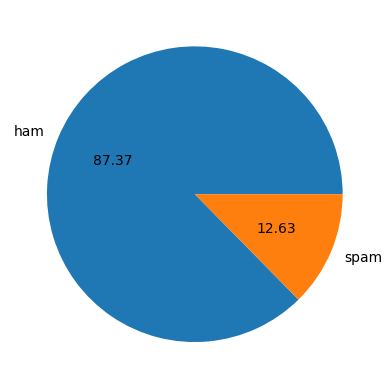

In [58]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

#conclusion: data is imbalanced

In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ronka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
#making new columns
df['num_chars'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [61]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [62]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_chars', ylabel='Count'>

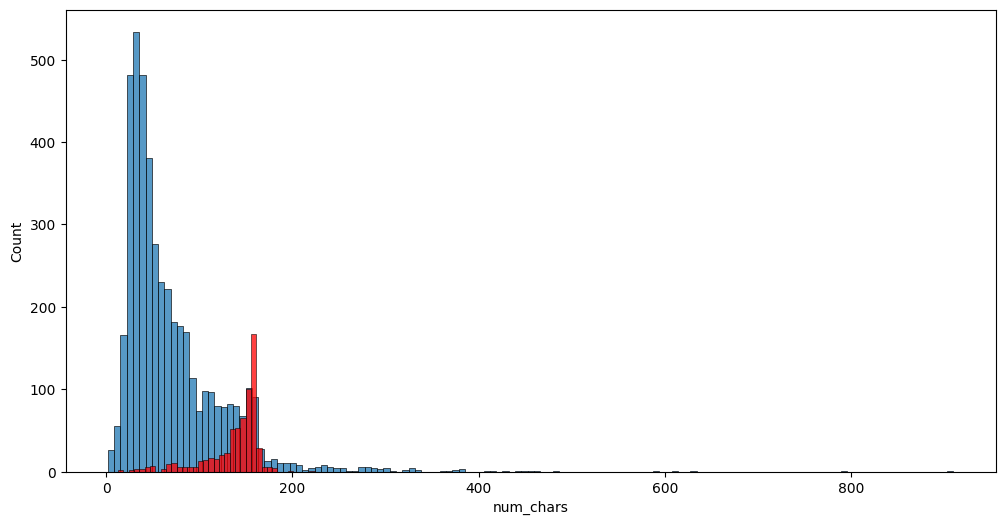

In [63]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'], color='red')

/home/ronka/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


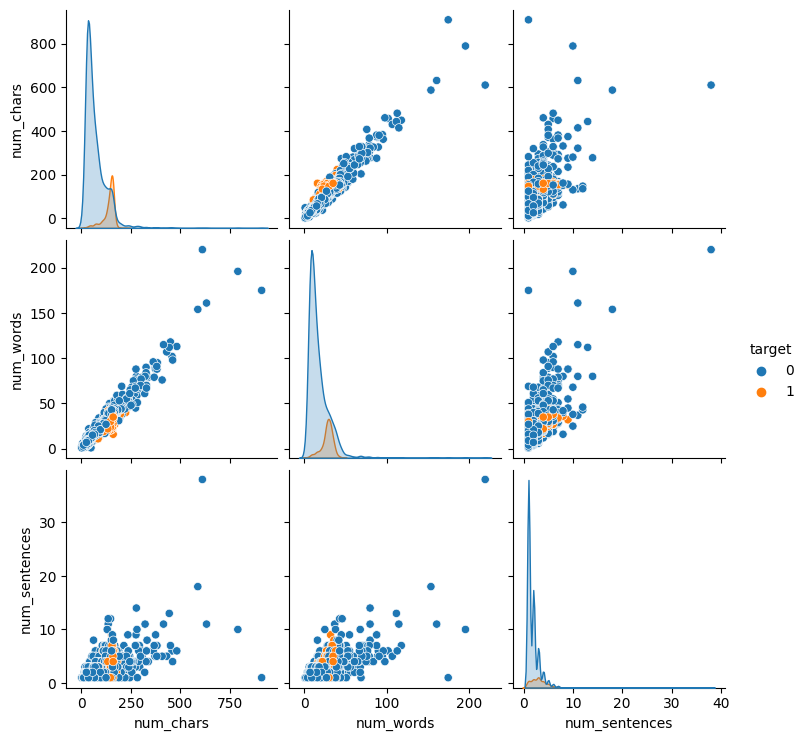

In [64]:
sns.pairplot(df, hue='target')

<Axes: >

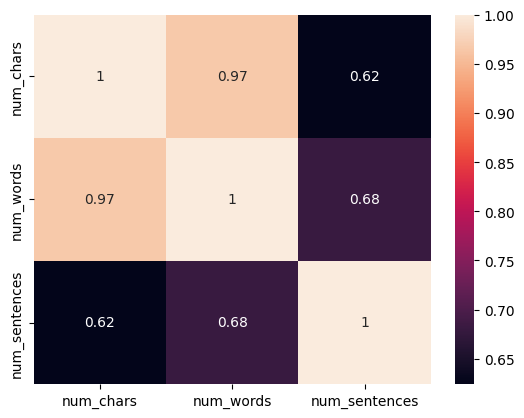

In [65]:
col = ['num_chars', 'num_words', 'num_sentences']

numeric_df = df[col].select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True)
#num_chars vs target = 0.38

In [66]:
print(df.dtypes)

target            int64
text             object
num_chars         int64
num_words         int64
num_sentences     int64
dtype: object


Data Preprocessing

In [67]:
import nltk
nltk.download('stopwords')
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/ronka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
def transform_text(text):
    #lowercase all words
    text = text.lower()

    #get them in tokens
    text = nltk.word_tokenize(text)
    
    #remove all special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #removing stopwords and punctuations    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [69]:
#testing our function   
transform_text('hello %% OH My God   --- THE Capital LETTERS ARE HERE ? reading writing yes yes no learning youtube')

'hello oh god capit letter read write ye ye learn youtub'

In [70]:
df['transformed_text'] = df['text'].apply(transform_text)

In [71]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [28]:
#to make a workcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


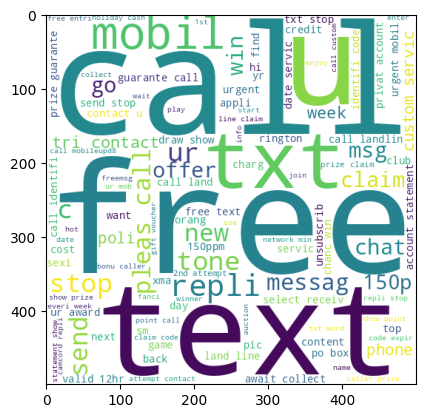

In [29]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

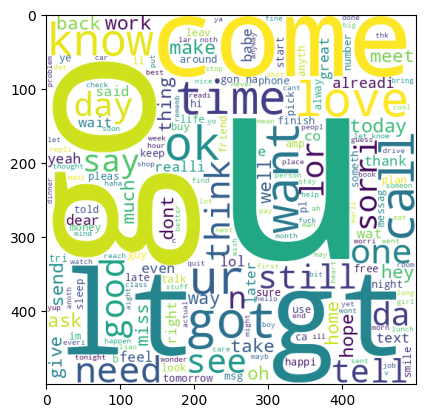

In [30]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [31]:
#trying to find out most used words in spam and ham
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [32]:
len(spam_corpus)

9939

In [72]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


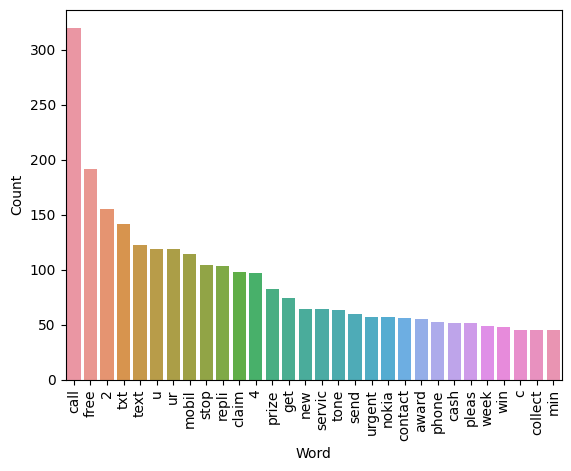

In [34]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()
word_counts = Counter(spam_corpus)

# Create a DataFrame from the most common 30 words and their counts
df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(data=df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [35]:
# from collections import Counter
# spam_counter = Counter(spam_corpus)
# most_common_30 = spam_counter.most_common(30)

# df = pd.DataFrame(most_common_30, columns=['Word', "Count"])
# sns.barplot(data=df, x='Word', y='Count')
# plt.xticks(rotation='vertical')
# plt.show()


Model Building

https://www.youtube.com/watch?v=O2L2Uv9pdDA

Naive Bayes is naive because it treats order of all words the same. ignores grammatical rules 


In [73]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [119]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [120]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [186]:
# cv = CountVectorizer()        #bag of words
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=2)

Since data is imbalanced, precision is more importatnt than accuracy

In [188]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnm = BernoulliNB()

In [189]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8914410058027079
0.5364583333333334
[[3275  356]
 [  93  412]]


In [190]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9042553191489362
1.0
[[3631    0]
 [ 396  109]]


In [191]:
bnm.fit(X_train, y_train)
y_pred3 = bnm.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.8870889748549323
0.9523809523809523
[[3629    2]
 [ 465   40]]


tfidf
mnb

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [193]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [194]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [195]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [196]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9557543520309478
Precision -  0.9497206703910615
For  KN
Accuracy -  0.8808027079303675
Precision -  1.0
For  NB
Accuracy -  0.9042553191489362
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.7145790554414785
For  LR
Accuracy -  0.9192456479690522
Precision -  0.8461538461538461
For  RF
Accuracy -  0.9523694390715667
Precision -  1.0
For  AdaBoost
Accuracy -  0.9480174081237911
Precision -  0.8918918918918919
For  BgC
Accuracy -  0.9335106382978723
Precision -  0.7426160337552743
For  ETC
Accuracy -  0.9576885880077369
Precision -  0.9940119760479041
For  GBDT
Accuracy -  0.937137330754352
Precision -  0.8024691358024691
For  xgb
Accuracy -  0.9426982591876208
Precision -  0.7863247863247863


In [197]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.880803,1.000000
2,NB,0.904255,1.000000
5,RF,0.952369,1.000000
8,ETC,0.957689,0.994012
0,SVC,0.955754,0.949721
6,AdaBoost,0.948017,0.891892
4,LR,0.919246,0.846154
9,GBDT,0.937137,0.802469
10,xgb,0.942698,0.786325
7,BgC,0.933511,0.742616


/home/ronka/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


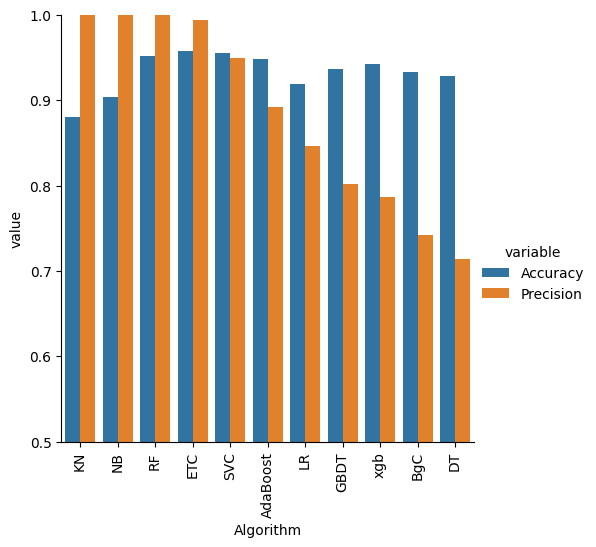

In [198]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

RF seems best 

In [199]:
import pickle

In [200]:
pickle.dump(tfidf,open('vectorizer.pkl', 'wb'))
pickle.dump(rfc,open('model.pkl', 'wb'))